In [1]:

import importlib
import proshestic_processor.prosthetic_hand_data_processor as prosthetic_hand_data_processor
importlib.reload(prosthetic_hand_data_processor)

from proshestic_processor.prosthetic_hand_data_processor import ProstheticHandDataProcessor

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
pilot_files = pd.read_csv('./data/meta_information.csv')
pilote_id = 1

In [3]:
# 1 pilot
# palm_file = ['./data/2023-05-15_16-16-08.palm'
#              ,'./data/2023-05-15_17-12-24.palm'
#              ,'./data/2023-06-05_16-12-38.palm'
#              ,'./data/2023-06-05_17-53-01.palm'
#              ,'./data/2023-06-20_14-43-11.palm']
# palm_file = ['./data/2023-05-15_16-16-08.palm']

# 2 pilot
# palm_file = ['./data/2023-09-13_22-14-05.palm'
#              ,'./data/2023-09-12_14-59-23.palm'
#              ,'./data/2023-09-12_12-55-22.palm'
#              ,'./data/2023-05-31_17-14-41.palm'
#              ,'./data/2023-05-31_15-46-37.palm']

# palm_file = ['./data/2023-05-31_17-14-41.palm']
            #  ,'./data/2023-05-31_15-46-37.palm'
            #  ,'./data/2023-09-12_12-55-22.palm'
            #  ]

# 2023-05-31_17-14-41.palm

palm_file = pilot_files[pilot_files.pilote_id == pilote_id].montage.apply(lambda x: './data/'+x).tolist()

In [4]:

processor = ProstheticHandDataProcessor(
                              palm_file,
                              pilote_id = pilote_id,  
                              n_omg_channels=50,
                              n_acc_channels=3, 
                              n_gyr_channels=3, 
                              n_enc_channels=6, 
                              n_mag_channels=0)

Всего файлов:                            7
Чтение файла значений:                   ./data/2023-05-15_16-16-08.palm
Чтение файла протокола жестов:           ./data/2023-05-15_16-16-08.palm
Количество записей:                      29145
Срезаем с и до:                          393 <> 29120
----------------------------------------------------------------------------------------------------
Чтение файла значений:                   ./data/2023-05-15_17-12-24.palm
Чтение файла протокола жестов:           ./data/2023-05-15_17-12-24.palm
Количество записей:                      29137
Срезаем с и до:                          395 <> 29109
----------------------------------------------------------------------------------------------------
Чтение файла значений:                   ./data/2023-06-05_16-12-38.palm
Чтение файла протокола жестов:           ./data/2023-06-05_16-12-38.palm
Количество записей:                      22368
Срезаем с и до:                          292 <> 22356
--------------

In [5]:
processor.vectors_cousine()
processor.clean_sensor_getter_by_cosine(.99)
processor.median_sensor_power_getter()
processor.clean_sensor_getter_by_power(25)
# df_to_style = processor.median_signal_power[['percent']]
# df_to_style.style.apply(highlight_red, below_level=25, subset=['percent'], axis=1)

Создание словаря с векторами в формате [сенсор][жест][шаг][значения], доступен через <object>.vectors 
Расчет косинусного сходства между векторами, сгруппированными по сенсорам, доступны через <object>.vectors_sum 
Максимальная сила сигнала: 2397.0
Выбор сенсоров с сильным сигналом, доступны через <object>.CLEAN_SENSORS_FINAL 


['3',
 '6',
 '12',
 '13',
 '16',
 '17',
 '21',
 '22',
 '27',
 '28',
 '30',
 '31',
 '38',
 '39']

In [6]:
processor.get_vectors_final()
processor.get_df_final()

Создание словаря с векторами только для выбранных сенсоров в формате [сенсор][жест][шаг][значения],
 доступны через <object>.vectors_final 
Создание pd.DataFrame для выбранных сенсоров,
 доступны через <object>.gestures_clean
 


In [7]:
processor.get_neutral_vectors()
processor.get_vector_median_length()
processor.get_median_vectors()

Создание словаря с векторами для нейтроального положения, только для выбранных сенсоров
в формате [сенсор][жест][шаг][значения],доступны через <object>.vectors_neutral
 
Получаем медианную длину вектора для нейтрального положения, доступны через <object>.vector_median_length
 
Получаем словари с медианными длинами векторов, дисперсией
формат [sensor][жесть][медианный вектор]
Доступны через <object>.median_vectors_all, <object>.median_vectors_diff



In [8]:
# print(processor.median_vectors_all['39'][0])
# print(processor.vectors_neutral['39'][0][176])

In [9]:
# processor.get_min_max_for_senser()
# processor.vector_correction_all()

In [10]:
processor.create_additional_features_1()
processor.create_additional_features_1_vector()
processor.calculate_additional_features_1_cosine()


Создадим дополнительные признаки, путем ссумирования подряд по 5 сенсоров
Доступны через <object>.additional_features_1
 
Создадим векторы на базе additional_features_1 и интерполируем их
Доступны через <object>.additional_features_1_vector
 
Рассчитаем косинусную схожесть на векторе additional_features_1_vector
Доступны через <object>.additional_features_1_cosine_mean
 


In [11]:
# processor.plot_sensors(processor.additional_features_1.columns, range(processor.additional_features_1.shape[0]),'af1')

In [12]:
# processor.plot_sensors(processor.OMG_CH, range(processor.gestures.shape[0]))
# processor.plot_sensors(processor.CLEAN_SENSORS_FINAL, range(processor.gestures.shape[0]),'hh')

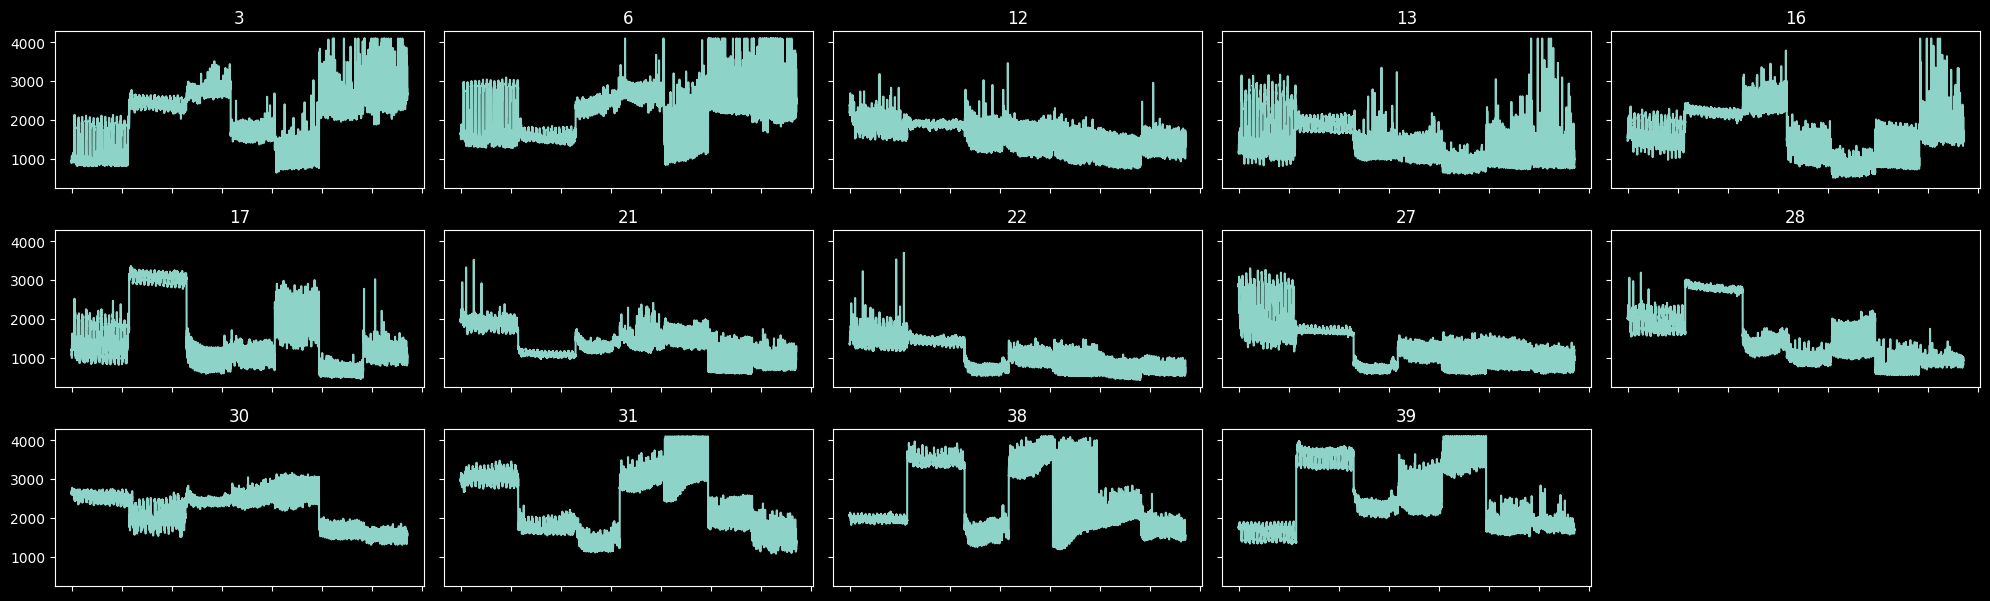

In [13]:

processor.plot_sensors(processor.CLEAN_SENSORS_FINAL, range(processor.gestures.shape[0]),'init')

In [14]:
# processor.plotly_sensor(0,'38','f')

In [15]:
processor.clean_sensor_getter_by_cosine(.975)
processor.median_sensor_power_getter()
processor.clean_sensor_getter_by_power(25)
print(processor.CLEAN_SENSORS_FINAL)
processor.clean_sensor_getter_by_cosine_add_feat_1(.999)
print(processor.CLEAN_SENSORS_ADD_FEATURE_1)
processor.get_vectors_final()
processor.get_df_final()

Максимальная сила сигнала: 2851.0
Выбор сенсоров с сильным сигналом, доступны через <object>.CLEAN_SENSORS_FINAL 
['3', '4', '6', '12', '13', '16', '17', '21', '22', '27', '28', '30', '31', '38', '39']
Выберем признаки из additional_features_1 согласно cosine
Доступны через <object>.CLEAN_SENSORS_ADD_FEATURE_1
 
['new_feature_7', 'new_feature_8']
Создание словаря с векторами только для выбранных сенсоров в формате [сенсор][жест][шаг][значения],
 доступны через <object>.vectors_final 
Создание pd.DataFrame для выбранных сенсоров,
 доступны через <object>.gestures_clean
 


In [16]:

processor.cleaned_df_diff_adding()

f:\Learnings\Motorika\Baseline\motorica-x-skillfactory-gestures\proshestic_processor\prosthetic_hand_data_processor.py:550: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gestures_clean.loc[:,'diff'] = diff_.sum(axis=1).values


In [17]:
processor.create_fix_gestures_df(shift = (-1,0))

Создаем таблицу смещения
Доступны через <object>.changes_df_info
 
Делаем смещение начало и конца жеста, согласно changes_df_info 


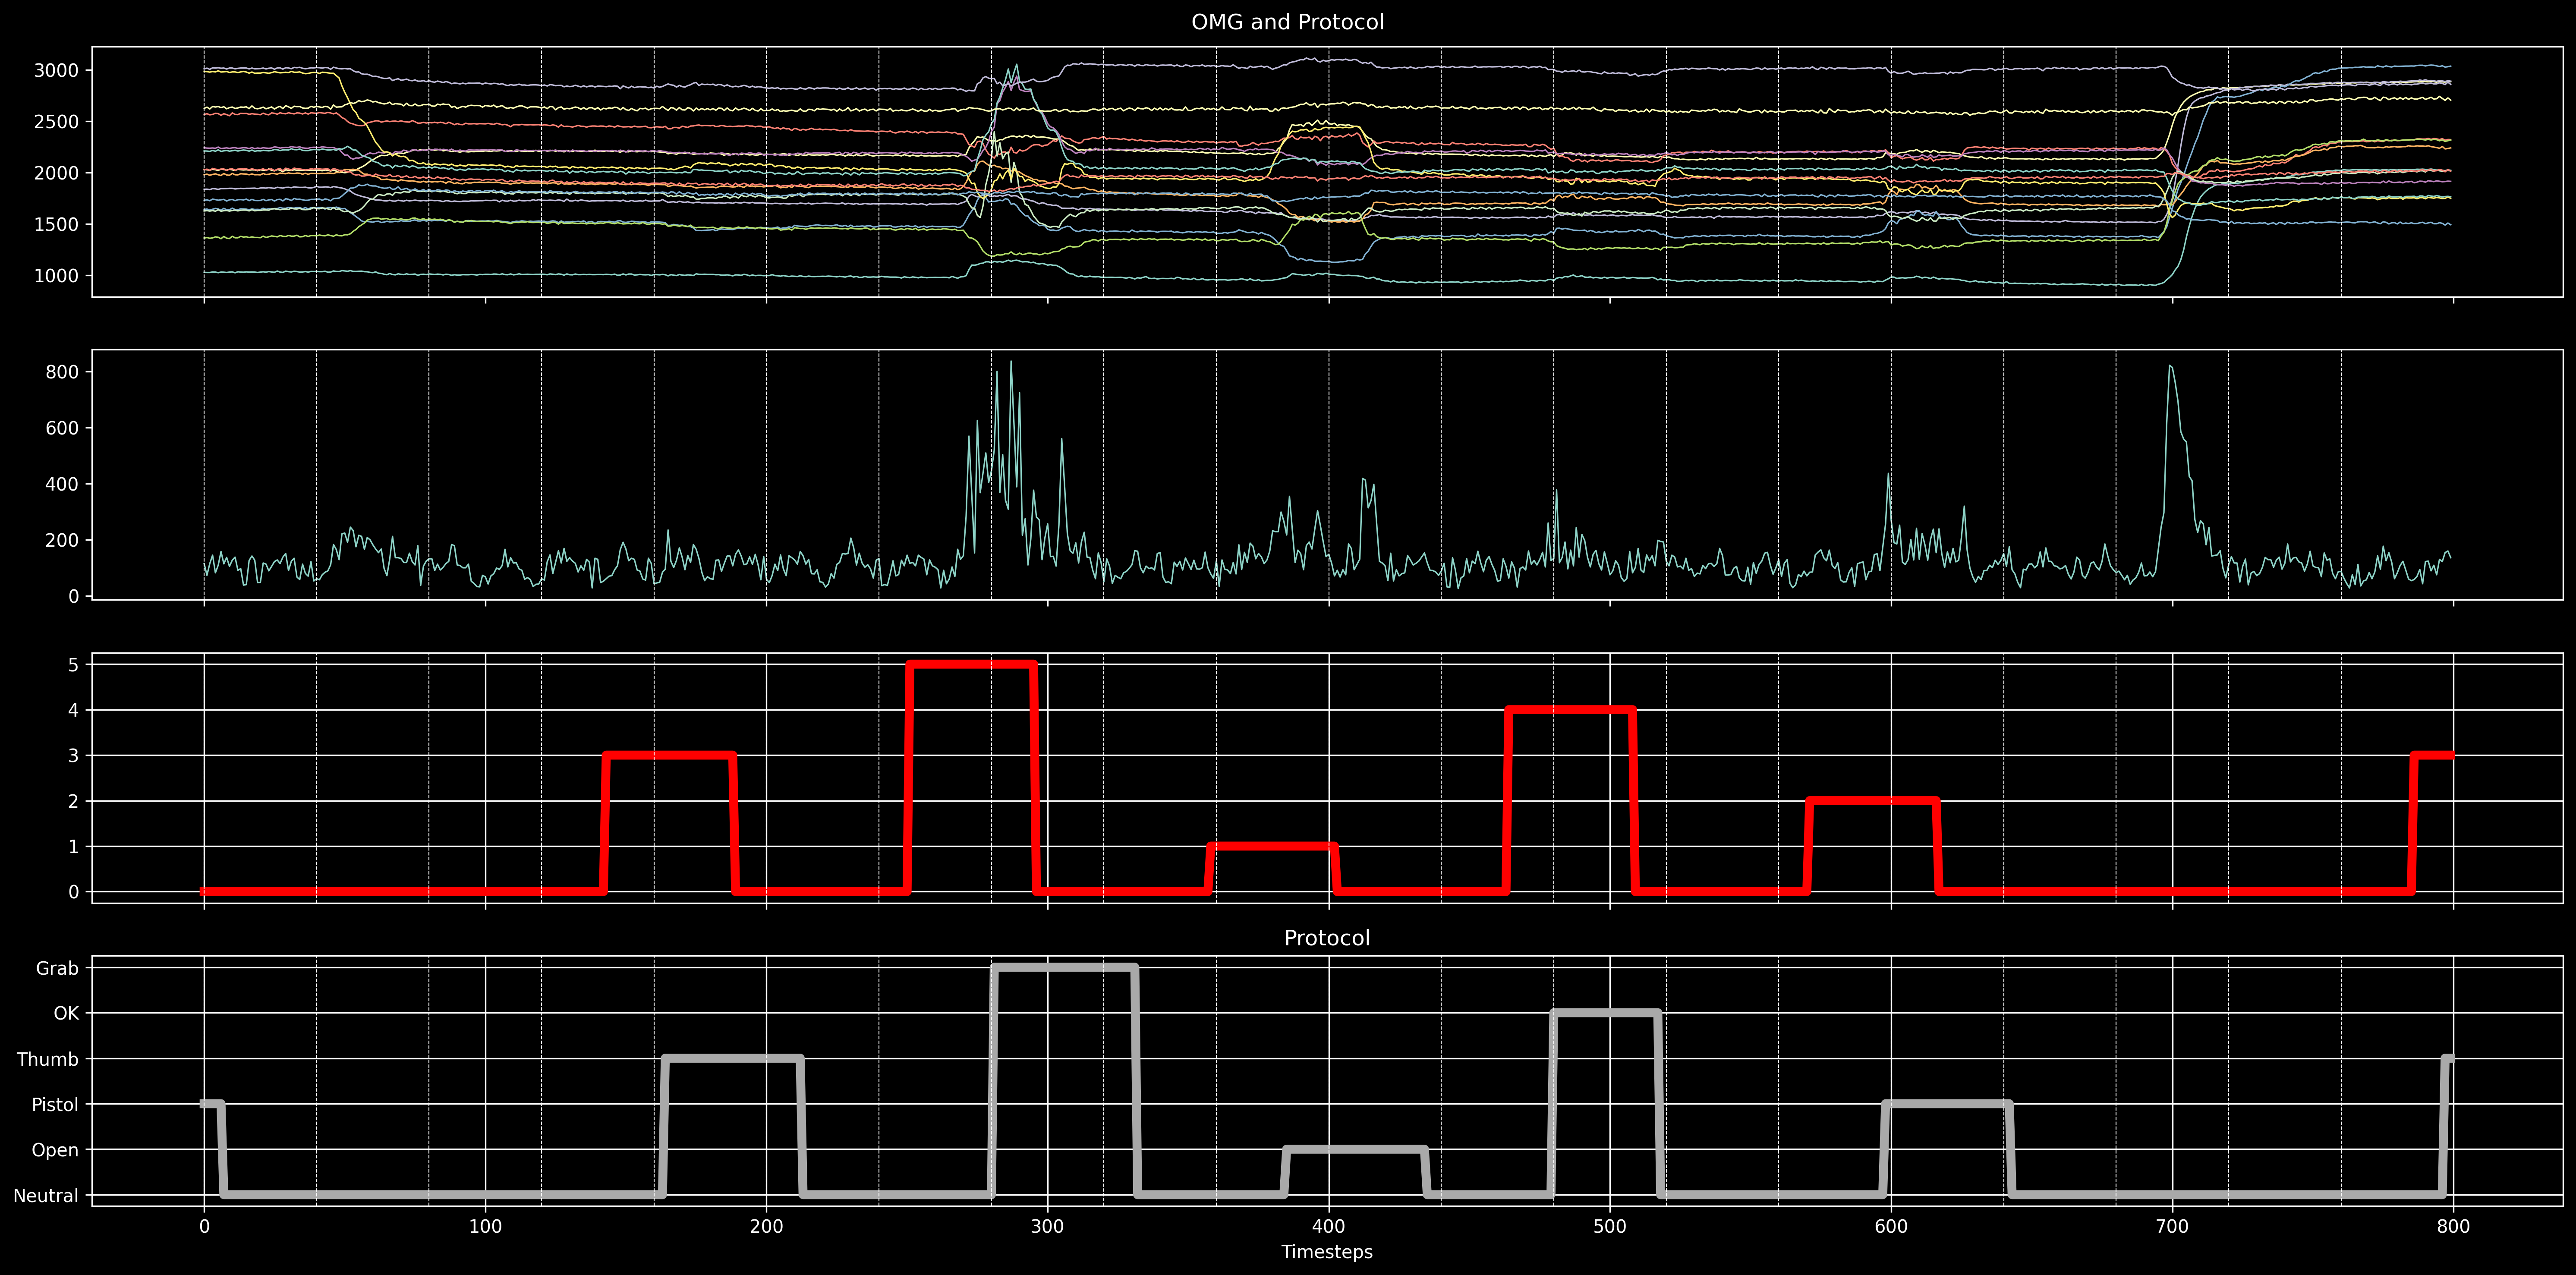

In [18]:
processor.graph_sensor_gestures(range(500, 1300),2)
# range_ = range(500, 1300)
# range_ = range(7400,8200)
# range_ = range(0,500)

In [19]:
processor.change_params(.99,25,.999,(0,0))

Максимальная сила сигнала: 2397.0
['3', '6', '12', '13', '16', '17', '21', '22', '27', '28', '30', '31', '38', '39']
['new_feature_7', 'new_feature_8']


f:\Learnings\Motorika\Baseline\motorica-x-skillfactory-gestures\proshestic_processor\prosthetic_hand_data_processor.py:550: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.gestures_clean.loc[:,'diff'] = diff_.sum(axis=1).values


## Modeling

In [20]:

X,X_init,y =processor.model_data_prepare(False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(134223, 16) (134223,)
(33556, 16) (33556,)


In [21]:
rf_params = {
    'n_estimators': 50,          # Количество деревьев
    'max_depth': 30,             # Ограничение глубины деревьев
    'min_samples_split': 5,      # Минимум 5 выборок для разделения
    'min_samples_leaf': 3,       # Минимум 3 выборки в листе
    'max_features': 'log2',      # Количество признаков для каждого разделения
    'random_state': 42
}


In [22]:
model = RandomForestClassifier(**rf_params)
model.fit(X = X_train, y=y_train)

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_leaf=3,
                       min_samples_split=5, n_estimators=50, random_state=42)

In [23]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [24]:
# processor.plot_results(y_train, y_pred_train, (20,4), .1)

In [25]:
# processor.plot_results(y_test, y_pred_test, (20,4), .2)

In [26]:
processor.get_statistic(y_train, y_pred_train,1)


              precision  recall  f1-score    support
Neutral           0.934   0.998     0.965  82927.000
Open              0.994   0.934     0.963   9999.000
Pistol            0.997   0.825     0.903  10292.000
Thumb             0.997   0.881     0.935  10740.000
OK                0.995   0.869     0.928  10423.000
Grab              0.995   0.921     0.957   9842.000
accuracy          0.955   0.955     0.955      0.955
macro avg         0.985   0.905     0.942 134223.000
weighted avg      0.957   0.955     0.954 134223.000


In [27]:
processor.get_statistic(y_test, y_pred_test,2)

              precision  recall  f1-score   support
Neutral           0.880   0.981     0.927 20789.000
Open              0.962   0.875     0.916  2511.000
Pistol            0.942   0.709     0.809  2553.000
Thumb             0.962   0.724     0.826  2722.000
OK                0.949   0.757     0.842  2630.000
Grab              0.960   0.827     0.889  2351.000
accuracy          0.903   0.903     0.903     0.903
macro avg         0.942   0.812     0.868 33556.000
weighted avg      0.908   0.903     0.900 33556.000


In [28]:
y_pred_train_init = model.predict(X_init)


In [29]:
# processor.plot_results(y, y_pred_train_init, (20,4), 1)


In [30]:
processor.get_statistic(y, y_pred_train_init,3)

              precision  recall  f1-score    support
Neutral           0.923   0.994     0.957 103716.000
Open              0.987   0.922     0.953  12510.000
Pistol            0.987   0.802     0.885  12845.000
Thumb             0.991   0.849     0.914  13462.000
OK                0.986   0.846     0.911  13053.000
Grab              0.988   0.903     0.944  12193.000
accuracy          0.944   0.944     0.944      0.944
macro avg         0.977   0.886     0.927 167779.000
weighted avg      0.947   0.944     0.943 167779.000


In [31]:
# results = pd.DataFrame([y,y_pred_train_init]).transpose().rename(columns={0: 'train',1:'pred'})

In [32]:
model_parameters = processor.get_params()
model_parameters['rf_params'] = rf_params
processor.save_stat('stats.json', model_parameters)

Новый объект добавлен успешно.


In [33]:
stat = processor.get_stat('stats.json')

In [34]:
stat.tail(3)

,pilote_id,cosine,cosine_add_feature_1,clean_sensor_final,clean_sensors_add_feature_1,use_add,rf_params,shift,sensor_power,precision.Neutral,...,recall.OK,recall.Grab,f1-score.Neutral,f1-score.Open,f1-score.Pistol,f1-score.Thumb,f1-score.OK,f1-score.Grab,features_num,features_add_1_num
32,1,0.995,0.999,"[3, 6, 12, 13, 16, 17, 21, 22, 27, 28, 30, 31,...","[new_feature_7, new_feature_8]",True,"{'n_estimators': 50, 'max_depth': 30, 'min_sam...","[-1, -1]",25.000,0.915,...,0.815,0.892,0.953,0.945,0.867,0.895,0.892,0.937,14,2
33,1,0.990,0.999,"[3, 6, 12, 13, 16, 17, 21, 22, 27, 28, 30, 31,...","[new_feature_7, new_feature_8]",True,"{'n_estimators': 50, 'max_depth': 30, 'min_sam...","[0, 0]",25.000,0.923,...,0.846,0.903,0.957,0.953,0.885,0.914,0.911,0.944,14,2
34,1,0.990,0.999,"[3, 6, 12, 13, 16, 17, 21, 22, 27, 28, 30, 31,...","[new_feature_7, new_feature_8]",True,"{'n_estimators': 50, 'max_depth': 30, 'min_sam...","[0, 0]",25.000,0.923,...,0.846,0.903,0.957,0.953,0.885,0.914,0.911,0.944,14,2


In [35]:
stat.filter(regex='^(recall|f1|shift)')


,shift,recall.Neutral,recall.Open,recall.Pistol,recall.Thumb,recall.OK,recall.Grab,f1-score.Neutral,f1-score.Open,f1-score.Pistol,f1-score.Thumb,f1-score.OK,f1-score.Grab
0,NaN,0.996,0.955,0.977,0.978,0.966,0.994,0.992,0.976,0.983,0.987,0.979,0.991
1,NaN,0.996,0.956,0.978,0.977,0.968,0.993,0.992,0.976,0.983,0.986,0.979,0.991
2,NaN,0.996,0.956,0.978,0.977,0.968,0.993,0.992,0.976,0.983,0.986,0.979,0.991
3,NaN,0.994,0.691,0.688,0.660,0.554,0.797,0.916,0.808,0.803,0.784,0.700,0.876
4,NaN,0.992,0.635,0.657,0.626,0.533,0.768,0.908,0.764,0.779,0.754,0.679,0.857
5,NaN,0.992,0.635,0.657,0.626,0.533,0.768,0.908,0.764,0.779,0.754,0.679,0.857
6,NaN,0.976,0.693,0.653,0.672,0.638,0.653,0.865,0.779,0.761,0.771,0.748,0.756
7,NaN,0.976,0.693,0.653,0.672,0.638,0.653,0.865,0.779,0.761,0.771,0.748,0.756
8,NaN,0.994,0.754,0.774,0.702,0.624,0.871,0.932,0.853,0.863,0.817,0.758,0.924
9,NaN,0.994,0.682,0.672,0.578,0.528,0.775,0.908,0.803,0.793,0.728,0.683,0.866


In [36]:
processor.get_min_max_stat_for_pilote(stat,1)

{'min': 0.8895197362555557,
 'min_id': 31,
 'max': 0.9301905309111111,
 'max_id': 33}

In [37]:
processor.get_model_params_by_id(stat, 33)

{'n_estimators': 50,
 'max_depth': 30,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'random_state': 42}

In [38]:
processor.get_params_by_id(stat, 33)

{'cosine': 0.99,
 'sensor_power': 25.0,
 'cosine_add_feature_1': 0.999,
 'use_add': True,
 'shift': <bound method NDFrame.shift of cosine                   0.990
 sensor_power            25.000
 cosine_add_feature_1     0.999
 use_add                   True
 shift                   [0, 0]
 features_num                14
 features_add_1_num           2
 Name: 33, dtype: object>,
 'features_num': 14,
 'features_add_1_num': 2}

In [41]:
processor.get_statistic_by_id(pd.read_json('stats.json'),33)

precision                         recall                      \
        stat_train stat_test stat_init stat_train stat_test stat_init   
Neutral      0.934     0.880     0.923      0.998     0.981     0.994   
Open         0.994     0.962     0.987      0.934     0.875     0.922   
Pistol       0.997     0.942     0.987      0.825     0.709     0.802   
Thumb        0.997     0.962     0.991      0.881     0.724     0.849   
OK           0.995     0.949     0.986      0.869     0.757     0.846   
Grab         0.995     0.960     0.988      0.921     0.827     0.903   

          f1-score                      
        stat_train stat_test stat_init  
Neutral      0.965     0.927     0.957  
Open         0.963     0.916     0.953  
Pistol       0.903     0.809     0.885  
Thumb        0.935     0.826     0.914  
OK           0.928     0.842     0.911  
Grab         0.957     0.889     0.944